In [33]:
import pickle
import requests
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np

load_dotenv()
key = os.getenv('API_KEY')
mrts = ["Yio Chu Kang", "Ang Mo Kio"]
api_url = "http://api.positionstack.com/v1/forward"

longLats = pickle.load(open('./longLat.pkl', 'rb'))

"""
responses = []
for mrt in mrts:
  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{mrt} MRT"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {mrt}. confidence of {first_response['confidence']}")

pickle.dump(longLats, open('./longLat.pkl', 'wb'))
len(longLats)
"""

'\nresponses = []\nfor mrt in mrts:\n  response = requests.get(f"{api_url}?access_key={key}&query={mrt}+station+singapore")\n  responses.append(response.json())\n  first_response = response.json()[\'data\'][0]\n  if (first_response[\'confidence\'] > 0.9) and (first_response[\'country\']==\'Singapore\'):\n    longLats[f"{mrt} MRT"] = (first_response[\'longitude\'], first_response[\'latitude\'])\n    print(f"{first_response[\'label\']}, confidence {first_response[\'confidence\']}")\n  else:\n    print(f"check {mrt}. confidence of {first_response[\'confidence\']}")\n\npickle.dump(longLats, open(\'./longLat.pkl\', \'wb\'))\nlen(longLats)\n'

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import re
import torch
#import matplotlib.pyplot as plt
import fastai.tabular.all as fastai
np.set_printoptions(linewidth=130)

# clean up data: area, date, floor, price
def load_csv():
  #return pd.read_csv('./data/Woodlands_June22_May23.csv')
  return pd.read_csv('./data/resale-flat-from-jan-2017.csv')
floor_dict = { f'0{i*3+1} TO 0{i*3+3}' if i < 3 else f'{i*3+1} TO {i*3+3}': i*3+2  for i in range(17)  }
def floor_cleanup(df):
  df['floor'] = df.storey_range.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  df.drop(['storey_range'], axis=1, inplace=True)
  return df
date_dict = { f'20{17+i}-0{j+1}' if j < 9 else f'20{17+i}-{j+1}': i*12+j  for i in range(7) for j in range(12)  }
def date_cleanup(df):
  df['date'] = df.month.apply(lambda x:float(date_dict[x]) if isinstance(x,str) else x)
  df.drop(['month'], axis=1, inplace=True)
  return df
def load_and_cleanup():
  df = load_csv()
  df = floor_cleanup(df)
  df = date_cleanup(df)
  return df

df = load_and_cleanup()
df.describe()
date_max = df.date.max()
#df.head()
dfA = df[(df.town=="ANG MO KIO") & (df.date > date_max-12)]
dfA

from pathlib import Path
file = Path('./data/AMK_June22_May23.csv')
dfA.to_csv(file,index=False)


In [8]:
def load_csv():
  return pd.read_csv('./data/AMK_June22_May23.csv')
df = load_csv()
blk_street = df.block + ' ' + df.street_name

responses = []
for add in blk_street.unique():
  response = requests.get(f"{api_url}?access_key={key}&query={add}+singapore")
  responses.append(response.json())
  first_response = response.json()['data'][0]
  if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
    longLats[f"{add}"] = (first_response['longitude'], first_response['latitude'])
    print(f"{first_response['label']}, confidence {first_response['confidence']}")
  else:
    print(f"check {add}. confidence of {first_response['confidence']}")

len(longLats)
#pickle.dump(longLats, open('./longLat.pkl', 'wb'))

321 Ang Mo Kio Avenue 1, Singapore, confidence 1
330 Ang Mo Kio Avenue 1, Singapore, confidence 1
219 Ang Mo Kio Avenue 1, Singapore, confidence 1
456 Ang Mo Kio Avenue 10, Singapore, confidence 1
536 Ang Mo Kio Avenue 10, Singapore, confidence 1
556 Ang Mo Kio Avenue 10, Singapore, confidence 1
549 Ang Mo Kio Avenue 10, Singapore, confidence 1
457 Ang Mo Kio Avenue 10, Singapore, confidence 1
557 Ang Mo Kio Avenue 10, Singapore, confidence 1
540 Ang Mo Kio Avenue 10, Singapore, confidence 1
584 Ang Mo Kio Avenue 3, Singapore, confidence 1
302 Ang Mo Kio Avenue 3, Singapore, confidence 1
571 Ang Mo Kio Avenue 3, Singapore, confidence 1
301 Ang Mo Kio Avenue 3, Singapore, confidence 1
119 Ang Mo Kio Avenue 3, Singapore, confidence 1
328 Ang Mo Kio Avenue 3, Singapore, confidence 1
117 Ang Mo Kio Avenue 4, Singapore, confidence 1
110 Ang Mo Kio Avenue 4, Singapore, confidence 1
172 Ang Mo Kio Avenue 4, Singapore, confidence 1
170 Ang Mo Kio Avenue 4, Singapore, confidence 1
503 Ang Mo Ki

887

In [9]:
pickle.dump(longLats, open('./longLat.pkl', 'wb'))

In [10]:
def lat_long(df):
  adds = (df.block + ' ' + df.street_name)
  longLat = adds.apply(lambda x: longLats[x])
  df['long'] = longLat.apply(lambda x: x[0])
  df['lat'] = longLat.apply(lambda x: x[1])
  return df
lat_long(df)
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,floor,date,long,lat
count,1041.000000,1041.000000,1.041000e+03,1041.000000,1041.000000,1041.000000,1041.000000
mean,85.005764,1987.995197,5.341646e+05,9.282421,70.314121,103.847913,1.370530
std,20.404608,14.924779,2.119421e+05,6.770337,3.478268,0.007677,0.004788
min,44.000000,1976.000000,2.188880e+05,2.000000,65.000000,103.831583,1.361017
25%,68.000000,1979.000000,3.700000e+05,5.000000,67.000000,103.841250,1.366979
50%,82.000000,1980.000000,4.430000e+05,8.000000,70.000000,103.849947,1.369989
75%,93.000000,1996.000000,6.800000e+05,11.000000,73.000000,103.854171,1.373711
max,176.000000,2019.000000,1.138000e+06,35.000000,76.000000,103.859199,1.383024


In [12]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "floor_area_sqm", "lease_commence_date", "date", "lat","long"],y_names=["resale_price"])
dls.show_batch()

,floor,floor_area_sqm,lease_commence_date,date,lat,long,resale_price
0,2.0,94.000000,2012.0,71.0,1.364928,103.843842,738000.0
1,8.0,118.999999,2012.0,67.0,1.364928,103.843842,920000.0
2,11.0,73.000000,1977.0,70.0,1.368308,103.847763,428800.0
3,5.0,74.000000,1979.0,72.0,1.364906,103.855209,372000.0
4,8.0,91.000000,1980.0,74.0,1.378892,103.838562,435000.0
5,23.0,118.999999,1979.0,76.0,1.367200,103.853249,700000.0
6,11.0,91.000000,1980.0,67.0,1.378892,103.838562,435000.0
7,11.0,92.000000,1979.0,69.0,1.366979,103.853912,518000.0
8,8.0,90.000000,2001.0,70.0,1.364396,103.850883,650888.0
9,5.0,73.000000,1979.0,74.0,1.369122,103.851631,405000.0


SuggestedLRs(valley=0.0014454397605732083, slide=6.309573450380412e-07)

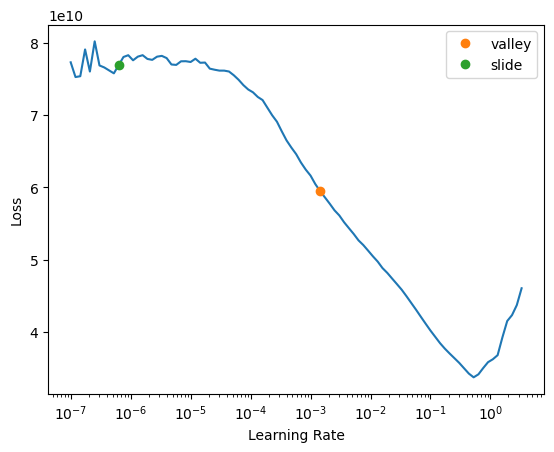

In [13]:
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


In [26]:
learn = fastai.tabular_learner(
  dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit_one_cycle(100,5e-2)
learn.validate()


Better model found at epoch 0 with valid_loss value: 34284.265625.


(#2) [1202924160.0,34284.265625]

In [19]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 36281.95703125.


(#2) [1330393984.0,36281.95703125]

In [38]:
# predict prices on map
row = df.drop(['resale_price'], axis=1).iloc[0].copy()
cats = ['floor', 'floor_area_sqm', 'lease_commence_date', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 4*20
n2 = 3*20
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    _, yPred, _ = learn.predict(row)
    prices[i][j] = yPred.item()

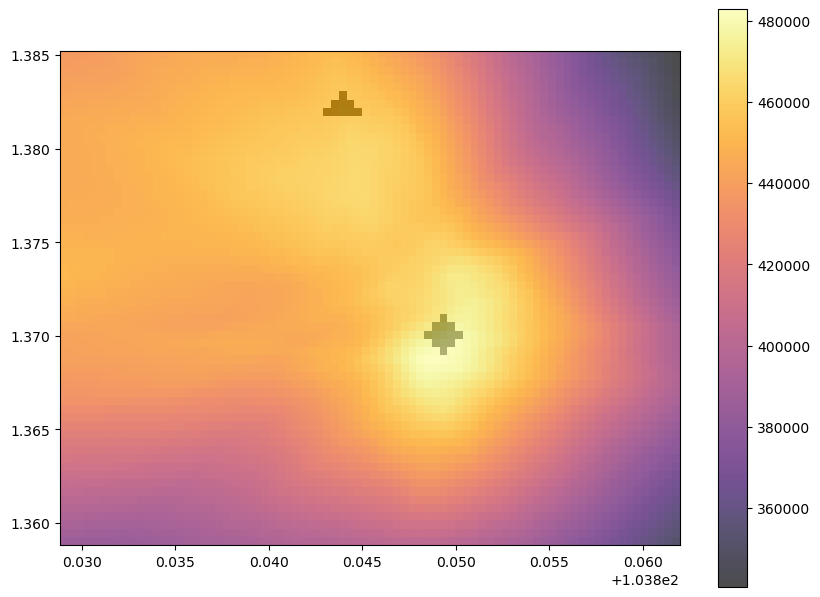

In [56]:
def min_coords(long,lat):
  return (np.abs((longs-long)).argmin(), np.abs(lats-lat).argmin())
mrt_map = np.zeros((n2,n1))
mrts = ["Yio Chu Kang MRT", "Ang Mo Kio MRT"]
#for mrt in mrts:
#  (i,j) = min_coords(*longLats[mrt])
#  #for m in range(3):
#  #  for n in range(3):
#  mrt_map[j+m-1][i+n-1] = 1

(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j+1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j-1][i-2]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i+2]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
"""
(i,j) = min_coords(*longLats[mrts[4]])
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i-2]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+2]=1
mrt_map[j+1][i+1]=1
mrt_map[j+1][i]=1
(i,j) = min_coords(*longLats[mrts[0]])
mrt_map[j-2][i+1]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i+1]=1
mrt_map[j+2][i+1]=1
(i,j) = min_coords(*longLats[mrts[2]])
mrt_map[j-2][i-1]=1
mrt_map[j-1][i-1]=1
mrt_map[j-1][i]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+2][i-1]=1
"""
(i,j) = min_coords(*longLats[mrts[1]])
mrt_map[j+1][i]=1
mrt_map[j+1][i-1]=1
mrt_map[j+1][i+1]=1
mrt_map[j-1][i]=1
mrt_map[j-1][i+1]=1
mrt_map[j-1][i-1]=1
mrt_map[j][i]=1
mrt_map[j][i-1]=1
mrt_map[j][i+1]=1
mrt_map[j][i-2]=1
mrt_map[j][i+2]=1
mrt_map[j+2][i]=1
mrt_map[j-2][i]=1


fig,ax=plt.subplots()
#mrt
#color map
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7, cmap='inferno')
bar = plt.colorbar(shw)
fig.set_figwidth(10)
fig.set_figheight(10/4*3)

plt.show()

In [50]:
longLeft,longRight

(103.8288214, 103.8619606)

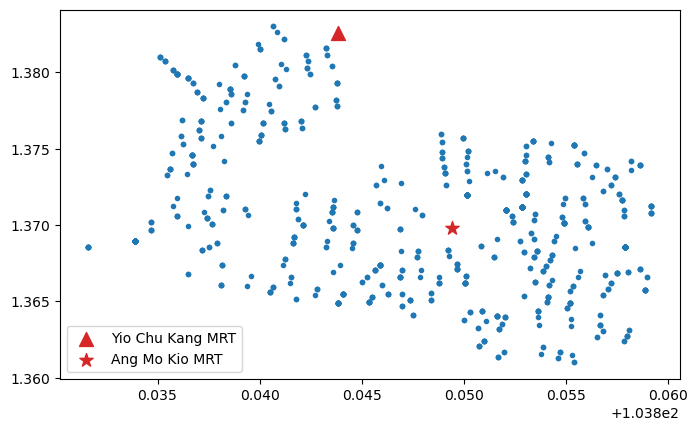

In [57]:
mrts = ["Yio Chu Kang MRT", "Ang Mo Kio MRT"]
markers = ["^", "*"]

fig,ax2=plt.subplots()
ax2.scatter(df.long,df.lat,marker='.')
for i,mrt in enumerate(mrts):
  ax2.scatter([longLats[mrt][0]], [longLats[mrt][1]],marker=markers[i],c='#d62728',label=mrt,s=100)
ax2.legend(loc='lower left')
fig.set_figwidth(8)

plt.show()


for mrt in mrts:
  (i,j) = min_coords(*longLats[mrt])
